# Random Forest 

Import libraries. 

In [1]:
# Import necessary libraries
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix 
from collections import Counter

# Import data 

New. 

In [6]:
# Load the data into pandas dataframes
X_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V6/data_04-06-2024/X_train_resampled.csv')
y_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V6/data_04-06-2024/y_train_resampled.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/data_04-06-2024/X_test.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/data_04-06-2024/y_test.csv')

X_train_res = X_train_res.drop(columns='Unnamed: 0', axis=1)
y_train_res = y_train_res.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

columns_VVR = ['Sum_1', 'Sum_2']

X_train_res  = X_train_res.drop(columns=columns_VVR, axis=1)
X_test  = X_test.drop(columns=columns_VVR, axis=1)

# Display the first few rows of each dataframe to verify the loading
print("X_train_res:")
display(X_train_res.head())

print("\ny_train_res:")
display(y_train_res.head())

print("\nX_test:")
display(X_test.head())

print("\ny_test:")
# print(y_test)
display(y_test.head())

# Convert the DataFrame to a 1-dimensional NumPy array
y_train_res = y_train_res.values.ravel()
y_test = y_test.values.ravel()


X_train_res:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,-0.114682,-0.412734,-0.175865,0.415941,-0.687555,-0.400360,0.970556,0.364929,0.619745,0.879270,...,-0.588472,0.201653,-1.080948,-1.005558,-1.057202,-1.532650,-1.499128,-1.273469,-2.129886,-2.037173
1,-0.038570,-0.768864,-0.561401,0.504332,-0.809168,-0.758472,0.333551,-0.368145,-0.254851,0.396542,...,0.289276,0.440930,0.189637,0.225341,1.063062,0.406128,0.477464,0.619122,-0.068091,0.354797
2,-0.436004,0.206480,0.369342,0.158133,-0.021607,0.244861,-0.836108,-0.490845,-0.445781,-0.359971,...,0.522235,0.440930,0.181549,0.373204,-0.399350,0.048667,0.213801,-0.150745,0.132589,0.169110
3,0.558569,0.560424,0.637285,0.504332,0.287352,0.558101,0.411212,0.165073,0.411670,0.893680,...,-0.045264,0.440930,-0.462771,-0.331676,-0.090762,-0.747721,-0.481159,0.330422,-0.600511,-0.671622
4,0.039454,0.762845,0.780378,0.364379,0.528676,0.748981,-0.131359,0.091414,0.330497,-0.057366,...,-0.535630,0.440930,-0.856850,-0.858808,0.063929,0.829485,0.764250,0.619122,0.779664,0.855063



y_train_res:


,VVR_group
0,1
1,1
2,1
3,0
4,0



X_test:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,-1.954248,-0.951158,-0.794258,-2.000083,0.255940,-0.532746,-1.756362,-0.587427,-0.613203,-1.822564,...,-0.166497,-0.729816,2.825468,1.673580,-2.233545,0.289550,0.393906,-0.511621,1.873165,0.899641
1,-0.531321,-0.178666,0.044588,0.504332,-0.398439,-0.134585,-0.306588,-0.141707,0.053531,-0.172644,...,-0.363370,-0.080351,-0.509222,-0.565219,-0.579429,-0.022861,0.158174,0.466753,-0.568289,-0.075143
2,-0.293895,0.814623,0.815957,0.504332,0.187131,0.677928,0.120579,1.064580,1.247824,0.900885,...,0.567536,0.440930,0.271424,0.449194,-0.116745,0.791976,0.739793,0.129936,0.675229,0.802541
3,-0.462186,-0.190678,0.033761,0.504332,-0.500519,-0.171970,0.077514,0.198167,0.447299,0.648713,...,0.187859,0.346928,-0.008672,0.055083,-0.336010,-0.518784,-0.261437,-0.190843,-0.460154,-0.433136
4,1.797969,2.225527,1.667268,0.504332,1.289613,1.707848,1.420513,0.971025,1.170829,0.893680,...,-0.077072,0.440930,-0.477280,-0.360369,0.855433,0.216467,0.340371,0.202111,0.358639,0.349728



y_test:


,VVR_group
0,0
1,0
2,0
3,0
4,0


Old.

In [2]:
# Load the data into pandas dataframes
X_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_train_res.csv')
y_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_train_res.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_test.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_test.csv')

X_train_res = X_train_res.drop(columns='Unnamed: 0', axis=1)
y_train_res = y_train_res.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

columns_VVR = ['VVR_1', 'VVR_2']

X_train_res  = X_train_res.drop(columns=columns_VVR, axis=1)
X_test  = X_test.drop(columns=columns_VVR, axis=1)

# Display the first few rows of each dataframe to verify the loading
print("X_train_res:")
display(X_train_res.head())

print("\ny_train_res:")
display(y_train_res.head())

print("\nX_test:")
display(X_test.head())

print("\ny_test:")
# print(y_test)
display(y_test.head())

# Convert the DataFrame to a 1-dimensional NumPy array
y_train_res = y_train_res.values.ravel()
y_test = y_test.values.ravel()


X_train_res:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,0.994371,0.345623,0.604597,0.877380,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,3.433959,2.208680,2.067588,0.898596,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,-0.351110,-0.286124,-0.130963,0.368186,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,-0.176376,0.226388,0.482241,0.304536,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,-0.530851,-0.455929,-0.383446,0.898596,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615



y_train_res:


,VVR_group
0,1
1,1
2,0
3,0
4,0



X_test:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,-1.088267,-0.486929,-0.245322,-0.094909,-0.387079,-0.373556,-0.296967,1.267608,1.407087,0.806658,...,-1.106604,-1.661648,-0.939358,-1.258986,-0.862599,0.657150,0.649175,0.619766,0.540339,0.684272
1,0.160204,0.681681,0.725849,0.514376,0.751085,0.775827,0.031562,0.457413,0.714380,0.686432,...,1.791290,0.458331,1.507769,1.887518,-0.111414,0.662918,0.653014,0.478080,0.552052,0.691181
2,-0.510947,-0.678086,-0.451146,-0.130749,-0.740730,-0.650167,-0.512662,-0.414737,-0.318792,0.290392,...,0.412202,0.458331,-0.395816,0.012935,0.703933,1.133047,0.952462,0.619766,0.765365,1.028129
3,1.139765,0.115481,0.300321,0.406855,0.152945,0.239720,0.621775,-0.239594,-0.067411,-0.190513,...,-0.009577,0.017708,-0.227168,-0.190216,1.476715,0.191834,0.323467,0.493823,0.412243,0.350324
4,1.257027,1.622690,1.325337,0.514376,1.084273,1.365502,1.155021,1.601645,1.655074,0.898596,...,0.075374,0.217235,-0.256234,-0.149869,-0.194813,-0.655535,-0.383937,-0.104406,-0.685164,-0.617897



y_test:


,VVR_group
0,0
1,1
2,0
3,1
4,0


# Model with inner and outer split

New. 

In [7]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR


# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
# Create the pipeline with RFE and the model
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe = RFE(estimator=DecisionTreeClassifier())
# rfe = RFE(SVR(kernel="linear"))
# rfe = RFE(SVC(kernel="linear"))
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

param_grid = {
    'm__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'm__class_weight': [{0: 0.6428571428571429, 1: 2.25}, None],  # Class weights
    'm__max_depth': [None, 10, 20],  # Maximum depth of the tree
    's__n_features_to_select': [5, 10, 20, 40, 60, 80]  # Number of features to select with RFE
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Print shape
print(X_train_res.shape)
print(y_train_res.shape)

# Fit model to training data to get best parameters
model.fit(X_train_res, y_train_res)

# Print best parameters
print(model.best_params_)

# Print the features that were selected with RFE

# Evaluate on the test set
best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

# Print shape
print(y_test.shape)
print(y_pred.shape)

# Print classification report 
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")


The mean score using nested cross-validation is: 0.676 ± 0.105
(102, 102)
(102,)
{'m__class_weight': None, 'm__max_depth': 20, 'm__n_estimators': 200, 's__n_features_to_select': 80}
(34,)
(34,)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.33      0.36      0.35        11

    accuracy                           0.56        34
   macro avg       0.51      0.51      0.51        34
weighted avg       0.57      0.56      0.56        34

[[15  8]
 [ 7  4]]
AUC-PR: 0.390


Old. 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html 

In [3]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR


# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
# Create the pipeline with RFE and the model
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe = RFE(estimator=DecisionTreeClassifier())
# rfe = RFE(SVR(kernel="linear"))
# rfe = RFE(SVC(kernel="linear"))
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

param_grid = {
    'm__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'm__class_weight': [{0: 0.6428571428571429, 1: 2.25}, None],  # Class weights
    'm__max_depth': [None, 10, 20],  # Maximum depth of the tree
    's__n_features_to_select': [5, 10, 20, 40, 60, 80]  # Number of features to select with RFE
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Print shape
print(X_train_res.shape)
print(y_train_res.shape)

# Fit model to training data to get best parameters
model.fit(X_train_res, y_train_res)

# Print best parameters
print(model.best_params_)

# Print the features that were selected with RFE

# Evaluate on the test set
best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

# Print shape
print(y_test.shape)
print(y_pred.shape)

# Print classification report 
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")

# # For class 0
# precision_0, recall_0, _ = precision_recall_curve(y_test, y_proba[:, 0], pos_label=0)
# auc_pr_0 = auc(recall_0, precision_0)
# print(f"AUC-PR for class 0: {auc_pr_0:.3f}")

# # For class 1
# precision_1, recall_1, _ = precision_recall_curve(y_test, y_proba[:, 1], pos_label=1)
# auc_pr_1 = auc(recall_1, precision_1)
# print(f"AUC-PR for class 1: {auc_pr_1:.3f}")

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
# print(metrics.auc(fpr, tpr))

The mean score using nested cross-validation is: 0.848 ± 0.047
(112, 102)
(112,)
{'m__class_weight': None, 'm__max_depth': 10, 'm__n_estimators': 200, 's__n_features_to_select': 60}
(32,)
(32,)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.14      0.14      0.14         7

    accuracy                           0.62        32
   macro avg       0.45      0.45      0.45        32
weighted avg       0.62      0.62      0.62        32

[[19  6]
 [ 6  1]]
AUC-PR: 0.223


# Confusion matrix 

New. 

/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_6769/260311700.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


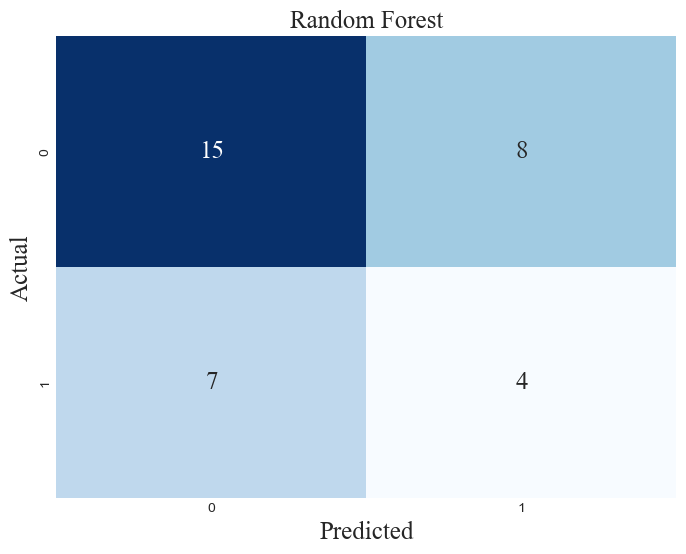

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

font = 'Times New Roman'
size = 18

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Create a custom diverging color map
colors = sns.color_palette("Blues", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Random Forest', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)

plt.show()


Old. 

/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_2179/260311700.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


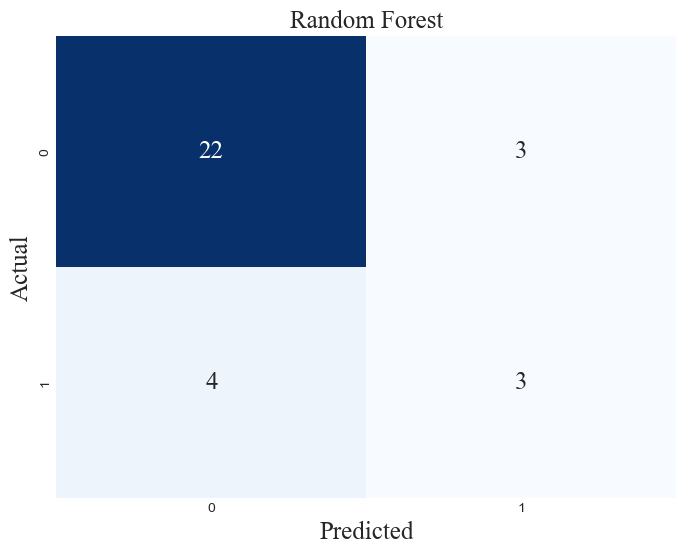

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

font = 'Times New Roman'
size = 18

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Create a custom diverging color map
colors = sns.color_palette("Blues", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Random Forest', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)

plt.show()


# For a hyperparameter table 

In [ ]:
import pandas as pd
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

# Define the parameter grid
param_grid = {
    'm__n_estimators': [100, 200, 300],
    'm__class_weight': [{0: 0.6428571428571429, 1: 2.25}, None],
    'm__max_depth': [None, 10, 20],
    's__n_features_to_select': [5, 1, 15]
}

# Create the pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

# Outer cross-validation
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# Initialize a DataFrame to store the results
results_df = pd.DataFrame()

# Iterate through each combination of parameters
for params in ParameterGrid(param_grid):
    # Set the parameters of the pipeline
    pipeline.set_params(**params)
    
    # Collect results for each fold
    fold_results = []
    for train_idx, test_idx in outer_cv.split(X_train_res, y_train_res):
        X_train, X_test = X_train_res.iloc[train_idx], X_train_res.iloc[test_idx]
        y_train, y_test = y_train_res[train_idx], y_train_res[test_idx]
        
        # Clone the pipeline to ensure independence
        clf = clone(pipeline)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Collect classification report and accuracy
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append results to the fold_results
        fold_results.append({'params': params, 'accuracy': accuracy, 'report': report})
    
    # Average the results over the folds
    avg_accuracy = sum(result['accuracy'] for result in fold_results) / len(fold_results)
    
    # Handle averaging of the classification report
    avg_report = {}
    avg_precision = 0
    avg_recall = 0
    avg_f1_score = 0
    for label in fold_results[0]['report']:
        if isinstance(fold_results[0]['report'][label], dict):
            avg_report[label] = {
                metric: sum(fold_result['report'][label][metric] for fold_result in fold_results) / len(fold_results)
                for metric in fold_results[0]['report'][label]
            }
            if label == 'weighted avg':
                avg_precision = avg_report[label]['precision']
                avg_recall = avg_report[label]['recall']
                avg_f1_score = avg_report[label]['f1-score']
        else:
            avg_report[label] = sum(fold_result['report'][label] for fold_result in fold_results) / len(fold_results)
    
    # Add the results to the DataFrame using pd.concat
    new_row = pd.DataFrame({
        'params': [params], 
        'accuracy': [avg_accuracy], 
        'precision': [avg_precision], 
        'recall': [avg_recall], 
        'f1-score': [avg_f1_score], 
        'report': [avg_report]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/Users/dionnespaltman/Desktop/V4/hyperparameters/grid_search_results.csv', index=False)

# Print the results
print(results_df)